 **Abstract**

About 422 million people worldwide have diabetes, the majority living in low-and middle-income countries, and 1.5 million deaths are directly attributed to diabetes each year. Both the number of cases and the prevalence of diabetes have been steadily increasing over the past few decades.   

Diabetes is a chronic, metabolic disease characterized by elevated levels of blood glucose (or blood sugar), which leads over time to serious damage to the heart, blood vessels, eyes, kidneys and nerves. The most common is type 2 diabetes, usually in adults, which occurs when the body becomes resistant to insulin or 

 doesn't make enough insulin. In the past 3 decades the prevalence of type 2 diabetes has risen dramatically in countries of all income levels. Type 1 diabetes, once known as juvenile diabetes or insulin-dependent diabetes, is a chronic condition in which the pancreas produces little or no insulin by itself. For people living with diabetes, access to affordable treatment, including insulin, is critical to their survival. There is a globally agreed target to halt the rise in diabetes and obesity by 2025.   

Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed. 

**Dataset overview**

The scale of diabetes problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly 327  billion dollars and total costs with undiagnosed diabetes and prediabetes approaching 400 billion dollars annuall.

Purpose of project  to build Logistic regression that can predict patient is sick on diabetes or not.

LIBRARY IMPORT

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset upload:

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Gokhman07/DIABETE_RESEARCH/master/diabetes_012_health_indicators_BRFSS2015.csv')

In [ ]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Our  dependent variable is 'Diabetes_012'. It defines , if man is scicked by diabetes.

0 = no diabetes 

1 = prediabetes

2 = diabetes

Description of the independent variables:


*   HighChol : 0 = no high cholesterol, 1 = high cholesterol
*   CholCheck: 0 = no cholesterol check in 5 years ; 1 = yes cholesterol check in 5 years
*  Body Mass Index - defines body index
*  Smoker   -  Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]  0 = no 1 = yes
*  Stroke - (Ever told) you had a stroke. 0 = no 1 = yes
*  HeartDiseaseorAttack - coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
*  PhysActivity - physical activity in past 30 days - not including job 0 = no 1 = yes
*  Fruits - Consume Fruit 1 or more times per day 0 = no 1 = yes
*  Veggies - Consume Vegetables 1 or more times per day 0 = no 1 = yes
*  HvyAlcoholConsump	- Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes

* AnyHealthcare - Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

* NoDocbcCost - Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
* GenHlth - Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
* MenthHlth - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how
* PhysHlth - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30
* DiffWalk - Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
* Sex - 0 = female 1 = male
* Age - 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
* Education - Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
* Income - Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more






Purpose of research build Linear Regression model, that will be able to predict diabetes from the attributes, that provides our dataset.

As we are going attributes correlation with our target value:

In [ ]:
df.corr()['Diabetes_012']

Diabetes_012            1.000000
HighBP                  0.271596
HighChol                0.209085
CholCheck               0.067546
BMI                     0.224379
Smoker                  0.062914
Stroke                  0.107179
HeartDiseaseorAttack    0.180272
PhysActivity           -0.121947
Fruits                 -0.042192
Veggies                -0.058972
HvyAlcoholConsump      -0.057882
AnyHealthcare           0.015410
NoDocbcCost             0.035436
GenHlth                 0.302587
MentHlth                0.073507
PhysHlth                0.176287
DiffWalk                0.224239
Sex                     0.031040
Age                     0.185026
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64

As we can see no variable has a 0 coorrelation value with our target value.

That means, that each variable has some impact on our target value.

As the next step we are going to show summary statistic of our dataset.

In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


As the next stage we are going to show summary statistics for people who are sicked by diabetes.

In [ ]:
df[df['Diabetes_012']==2].describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,35346.0,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,...,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000
mean,2.0,0.752674,0.670118,0.993182,31.944011,0.518220,0.092457,0.222882,0.630538,0.585441,...,0.959769,0.105868,3.290981,4.461806,7.954479,0.371216,0.479121,9.379053,4.745516,5.210094
std,0.0,0.431464,0.470177,0.082292,7.363401,0.499675,0.289675,0.416186,0.482666,0.492653,...,0.196503,0.307673,1.009928,8.947717,11.301491,0.483137,0.499571,2.330273,1.060617,2.217319
min,2.0,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.0,1.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000,3.000000
50%,2.0,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,10.000000,5.000000,6.000000
75%,2.0,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,15.000000,1.000000,1.000000,11.000000,6.000000,7.000000
max,2.0,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


As the next stage we are going to show summary statistics for people who are not sicked by diabetes.

In [ ]:
df[df['Diabetes_012']==0].describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,213703.0,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000,...,213703.000000,213703.00000,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000,213703.000000
mean,0.0,0.371132,0.379171,0.957104,27.742521,0.429680,0.031628,0.071833,0.779077,0.643023,...,0.949739,0.07961,2.372391,2.944404,3.582416,0.132282,0.433985,7.786559,5.106629,6.208663
std,0.0,0.483109,0.485182,0.202623,6.260993,0.495032,0.175008,0.258212,0.414870,0.479109,...,0.218484,0.27069,1.019367,7.064440,7.999205,0.338798,0.495624,3.104942,0.960423,2.005203
min,0.0,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.0,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.0,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.0,1.000000,1.000000,1.000000,30.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.00000,3.000000,2.000000,2.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,0.0,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Now are going to provide visual comparison for some attributes from people who is or not sicked by diabetes.

Splitting dataset on diabetese and no diabetese data

DIABETESE DATA

In [ ]:
df_diab=df[df['Diabetes_012']==2]
df_diab.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
10,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
13,2.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
17,2.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
23,2.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0


NO DIABETESE DATA

In [ ]:
no_df_diab=df[df['Diabetes_012']==0]
no_df_diab.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0




---
Analysis of 'Income attribute' attribute



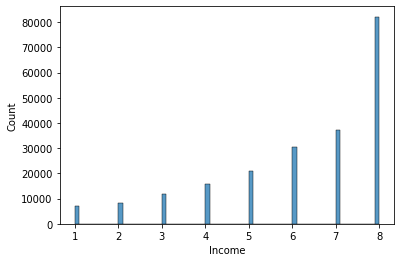

In [ ]:
sns.histplot(data=no_df_diab,x='Income')

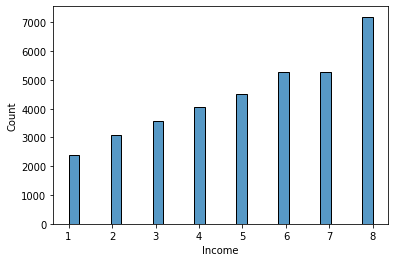

In [ ]:
sns.histplot(data=df[df['Diabetes_012']==2],x='Income')

As we can see people in categoty with no high income have more cases of diabetes.



---


Analysis of 'PhysHlth' attribute

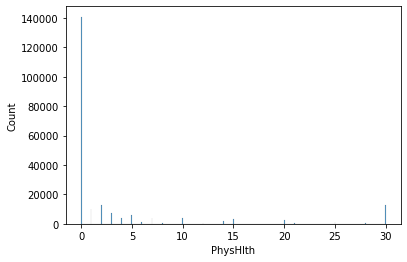

In [ ]:
sns.histplot(data=no_df_diab,x='PhysHlth')

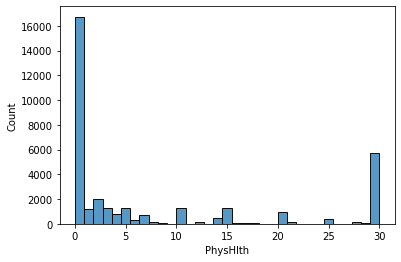

In [ ]:
sns.histplot(df_diab,x='PhysHlth')

People that have problems with illness have more chance to get diabetes.



---


Analysis of 'Sex' attribute

In [ ]:
no_df_diab['Sex']=no_df_diab['Sex'].replace(0,'female').replace().replace(1,'male')

<ipython-input-14-0b642adb6622>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_df_diab['Sex']=no_df_diab['Sex'].replace(0,'female').replace().replace(1,'male')


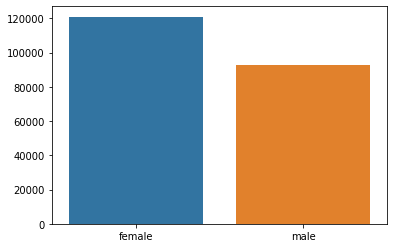

In [ ]:
sns.barplot(x=no_df_diab['Sex'].value_counts().index,y=no_df_diab['Sex'].value_counts().values)

In [ ]:
df_diab['Sex']=df_diab['Sex'].replace(0,'female').replace().replace(1,'male')

<ipython-input-16-bee7256bb7d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diab['Sex']=df_diab['Sex'].replace(0,'female').replace().replace(1,'male')


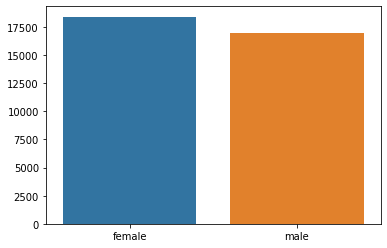

In [ ]:
sns.barplot(x=df_diab['Sex'].value_counts().index,y=df_diab['Sex'].value_counts().values)

As we can have much more man with diabetes that without it.



---


Analysis of 'Smoker' attribute


In [ ]:
no_df_diab['Smoker']=no_df_diab['Smoker'].replace(0,'no').replace().replace(1,'yes')

<ipython-input-18-150122a8fec0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_df_diab['Smoker']=no_df_diab['Smoker'].replace(0,'no').replace().replace(1,'yes')


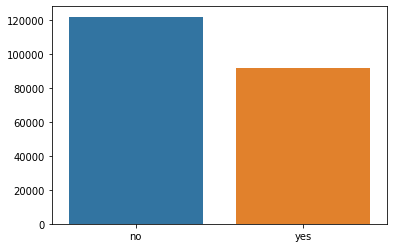

In [ ]:
sns.barplot(x=no_df_diab['Smoker'].value_counts().index,y=no_df_diab['Smoker'].value_counts().values)

In [ ]:
df_diab['Smoker']=df_diab['Smoker'].replace(0,'no').replace().replace(1,'yes')

<ipython-input-20-e7d6065e0487>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diab['Smoker']=df_diab['Smoker'].replace(0,'no').replace().replace(1,'yes')


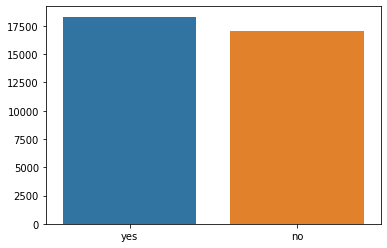

In [ ]:
sns.barplot(x=df_diab['Smoker'].value_counts().index,y=df_diab['Smoker'].value_counts().values)

We have people with daibetes who smokes.



---
SPLITTING DATA FOR LOGISTIC REGRESSION MODEL


In [ ]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
from sklearn.model_selection  import train_test_split

We are going change transform our value to format diabetes and no diabetes (0 or 1).

Delete  row, that present people with prediabetes status

In [ ]:
df.drop(df[df['Diabetes_012']==1].index,inplace=True)

In [ ]:
df['Diabetes_012']=df['Diabetes_012'].replace(2,1)

In [ ]:
x=df.iloc[:,1:]
y=df['Diabetes_012']

SPLITTIG DATA INTO TRAINING AND TEST SETS

In [ ]:
from sklearn.model_selection  import train_test_split

We split data in the next way:


Train part - 70 %

Test part  - 30%


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,
                                                  random_state=80)

Show X_train

In [ ]:
X_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
241240,1.0,0.0,1.0,36.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,5.0,4.0,5.0
227674,1.0,0.0,1.0,38.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,4.0,6.0
72204,1.0,1.0,1.0,39.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,4.0
39452,1.0,0.0,1.0,19.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,28.0,2.0,0.0,0.0,5.0,6.0,8.0
11447,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,0.0,13.0,5.0,5.0


Show X_test

In [ ]:
X_test.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
54897,1.0,1.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,4.0,5.0
227290,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
173581,1.0,1.0,1.0,27.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,10.0,30.0,0.0,0.0,11.0,5.0,5.0
142605,0.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0
202915,1.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,3.0,10.0,0.0,0.0,8.0,5.0,8.0


After our data is splitted we are going to fit   Logistic model.
We are going to use it from sklearn library.

In [ ]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm=lm.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The coefficients are given by

In [ ]:
lm.coef_

array([[ 0.73402815,  0.76059186, -0.79009585,  0.05325783,  0.04919078,
         0.13289606,  0.1262728 , -0.1138011 , -0.30004945, -0.1748995 ,
        -1.13839057, -0.56400746, -0.34568299,  0.46302683, -0.00611054,
        -0.00535216,  0.09346265,  0.20559553,  0.12937545, -0.12488842,
        -0.07542229]])

In [ ]:
lm.intercept_

array([-3.93696028])

Check on the test data

In [ ]:
y_pred=lm.predict(X_test)

In [ ]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

We will use Accuracy for our result evaluation

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.858756608445426

We  will consider the next evaluations for our model:

Precision -  proportion of positive identifications was actually correct

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(y_test,y_pred)

0.5184004636337294

Recall -  is intuitively the ability of the classifier to find all the positive samples.

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_test, y_pred)

0.16750936329588015

ROC curve -  is a metric that we can use to lower both the FP(false positive) and FN(false negative)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test,y_pred)

0.5707774035968742

During our research we faced overfitting process. 
To deal with overfitting process we should decrease number of parametrs in our model.
We choose the next strategy: choose several paramets that have bigger correlation with target value than others.
We are going to try the several number of paramets.

We are going by choosing from 3 to 10 parametrs

In [ ]:
for i  in range(3,11):
 general_attrs=df.corr()['Diabetes_012'].sort_values(ascending=False)[1:i].index
 x2=df.loc[:,general_attrs]
 y2=df['Diabetes_012']

 X_train2, X_test2, y_train2, y_test2=train_test_split(x2,y2,test_size=0.3,
                                                  random_state=80)
 
 lm2=LogisticRegression()
 lm2.fit(X_train2, y_train2)

 y_pred2=lm2.predict(X_test2)

 print(f'Number of parametrs: {i-1}. Accuracy: {accuracy_score(y_test2,y_pred2)}')


Number of parametrs: 2. Accuracy: 0.8551964130362042
Number of parametrs: 3. Accuracy: 0.8559726962457338
Number of parametrs: 4. Accuracy: 0.859131365856923
Number of parametrs: 5. Accuracy: 0.860416248410627
Number of parametrs: 6. Accuracy: 0.8603359432510206
Number of parametrs: 7. Accuracy: 0.8605634745365723


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of parametrs: 8. Accuracy: 0.8600013384193268
Number of parametrs: 9. Accuracy: 0.8604296326038948


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Unfortunately our accuracy is note becoming much better  when use less parametrs.

The next we are going to make our model better is by changing threshold

In [ ]:
#Predicted probability
y_predict_prob=lm2.predict_proba(X_test)
print(y_predict_prob)

[[0.71399772 0.28600228]
 [0.9708887  0.0291113 ]
 [0.73765773 0.26234227]
 ...
 [0.63881592 0.36118408]
 [0.94214101 0.05785899]
 [0.94494136 0.05505864]]


Default threshold is 0.5.

At first we are going to chack it on different thresholds:

In [ ]:
for i in range(1,9):
  y_predict_class=[1 if prob[1]>i/10 else 0 for prob in y_predict_prob]
  print(f'Threshold is:{i/10}. Accuracy: is : {accuracy_score(y_test,y_predict_class)}')

Threshold is:0.1. Accuracy: is : 0.6583015458743224
Threshold is:0.2. Accuracy: is : 0.7877668473532757
Threshold is:0.3. Accuracy: is : 0.8365120792344242
Threshold is:0.4. Accuracy: is : 0.8561734591447501
Threshold is:0.5. Accuracy: is : 0.8604296326038948
Threshold is:0.6. Accuracy: is : 0.8607642374355886
Threshold is:0.7. Accuracy: is : 0.858917218764639
Threshold is:0.8. Accuracy: is : 0.8573244997657766


The best result with threshold 0.6.

**Conclusions:** 



*   We researched impact of different attributes
*   Showed summary statistics of the attributes
*   Make inferences with data visualisation.
*   Our model shows the best accuracy near 86% with threshold parameter 0.6.

**Citations:**


*   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
*  https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset - Dataset resource (only dataset was taken from there)

